In [ ]:
"""
Zadanie 2.

Przygotuj chmurę słów (lub wykres kolumnowy dla 50 najczęściej używanych słów) w oparciu o *bag-of-words*. Dla pozyskanych przez Ciebie dokumentów (w języku angielskim). Korpus ma odzwierciedlać pewną dychotomię - konflikt, dyskusję dwóch stron pewnego zjawiska np: zmian klimatycznych, lockdownu, ulubionego sportu (rugby vs. piłka nożna). Mogą to być: teksty tweetów na wybrane tematy (min 1000 tweetów dla każdej strony); dwóch grup artykułów (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów); wypowiedzi dwóch ekspertów czy polityków (po 3-5 dla każdej strony, każdy ponad 2000 wyrazów).

Analizę wykonaj w dwóch wersjach:

1. dwa teksty traktowane są osobno - jako dwa osobne korpusy, przygotuj dwie wizualizacje dla każdej strony osobno.
2. dwa teksty traktowane są jako jeden i wykonaj wizualizację prezentującą:

    - termów charakterystycznych dla każdej ze stron (termy pojawiające się w wypowiedziach jednej strony ale nie pojawiające się w wypowiedziach drugiej strony),
    - termów wspólnych dla dwóch stron (termy pojawiające się w wypowiedziach jednej i drugiej strony jednocześnie).
"""

In [5]:
import twint
import nest_asyncio
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('SnowballStemmer')

nest_asyncio.apply()

In [6]:
#Funkcja pobierająca dane za pomocą biblioteki twint
def get_data(query, limit):
    c = twint.Config()
    c.Search = query
    c.Lang = 'en'
    c.Limit = limit
    c.Pandas = True
    twint.run.Search(c)
    tweets = twint.storage.panda.Tweets_df
    return tweets

In [35]:
#Funkcja oczyszczająca tweety
def cleaned_tweets(tweet):
    # normalizacja tekstu
    temp = re.sub("\s{2,}", " ", tweet)
    temp = re.sub("(\r\n|\r|\n)", " ", temp) 
    temp = temp.lower() 
    temp = re.sub("rt", "", temp) 
    temp = re.sub("&amp", "", temp) 
    temp = re.sub("#[a-z,A-Z]*", "", temp)
    temp = re.sub("@\w+", "", temp) 
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) 
    temp = re.sub("http(s?)([^ ]*)", "", temp)
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) 
    temp = re.sub("\d", "", temp) 
    temp = re.sub("\s{2,}", " ", temp) 
    temp = temp.strip()
    
    # usuwanie duplikatów ze zbioru
    words_set = set(temp.split())
    words_list = list(words_set)
    
    # tokenizacja
    tokens = nltk.word_tokenize(" ".join(words_list))
    
    # tworzenie listy stop słów
    stopwords = ["a", "able", "about", "across", "after", "all", "almost", "also", "am", "among", "an", "and", "any", "are", "as", "at", "be", "because", "been", "but", "by", "can", "cannot", "could", "dear", "did", "do", "does", "either", "else", "ever", "every", "for", "from", "get", "got", "had", "has", "have", "he", "her", "hers", "him", "his", "how", "however", "i", "if", "in", "into", "is", "it", "its", "just", "least", "let", "like", "likely", "may", "me", "might", "most", "must", "my", "neither", "no", "nor", "not", "of", "off", "often", "on", "only", "or", "other", "our", "own", "rather", "said", "say", "says", "she", "should", "since", "so", "some", "than", "that", "the", "their", "them", "then", "there", "these", "they", "this", "tis", "to", "too", "twas", "us", "wants", "was", "we", "were", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "would", "yet", "you", "your"]
    stopwords = stopwords + ["brexit", "remain", "s", "t", " "]
    temp = " ".join([word for word in temp.split() if word not in stopwords])
    
    # stemming
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(token) for token in tokens if not token in stopwords]
    
    return stemmed_tokens

In [22]:
# Definicja funkcji generującej chmurę słów
def generate_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue')
    wordcloud.generate(data)
    plt.figure(figsize = (8, 8), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [19]:
# pobranie tweetów na temat Brexitu
brexit_tweets = get_data("Brexit", 1000)
# pobranie tweetów na temat zostania w UE
remain_tweets = get_data("Remain", 1000)

1640345905659346944 2023-03-27 15:31:54 +0200 <ThinkingSilicon> @john4brexit Loving the Brexit BS. Company with 800 staff in UK increasing by 12% (100 staff) decide to open new office.  Company with 200 staff in EU could fit 12% more staff in same office by shifting desks for 25 more.
1640345884952076288 2023-03-27 15:31:49 +0200 <fcukBrexit> @bringiton8712 @Edwardaardvark @somechewlip @Michael80789776 @Stephen1010102 @Musc1esbri2 @PhoneyItalian @CharlieCarlsbad @LitespeedBlue @987_charles @damienXTR @just2sayin @LeftBehindPoet @Martin020455 @Charlie_Orignal @cathyby @thefactroom @boomer_ish @Davidmetroland @ChrisEv06631592 @Claesson_Kate @afewpoints @David19531501 @David_Vaporium @gibberingloudly @JohnRya13591294 @DeanIvy3 @rec777777 @The_Leaver @PetrasPics66 @MattAdkin @viv_cooper @Bellagio_bound @RicoCharpentier @KPZ066 @CSY10111 @bromhome @southlondonjohn @lordgmanilson @dickie_frances @BogCleaner1 @Begentle50 @LordOfFreedom2 @mindedmusically @suastusa @musicalbounce @albaa_maha @t

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1640340066999627776 2023-03-27 15:08:42 +0200 <EnoTheWonderdog> @LewisCox_star Ok I had to look up Scran (I left in the 70's when I was 12) For a country that's voted for Brexit and no bloody foreigners being allowed in there's an awful lot of stuff there that aren't Cornish Pasties, a Ploughman's or Fish and Chips..
1640340058480803842 2023-03-27 15:08:40 +0200 <Mr_EssBee> @LizWebsterLD @BorisJohnson @OBR_UK Sorry, just to add, Liz…  I’m not sure this is *due to* Brexit but it does rather stick a fly in the ointment of your narrative, doesn’t it?
1640340007029178369 2023-03-27 15:08:28 +0200 <TheFatHippo57> @MCFC_CP31 @Arron_banks Can you *eat* sovereignty? Does it pay your bills? No? But Brexit demonstrably made people poorer, so what use is all that 'sovereignty' to them? In fact the only people who actually profited from it, are people like Mr. Banks here, and you're literally paying for it.
1640339971620974593 2023-03-27 15:08:19 +0200 <BrexitBuster> @RobBaron10 @donkey235 I wonde

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1640331827096289282 2023-03-27 14:35:58 +0200 <BrexitRage> @happylecinq Well, you can, but alcohol dulls the mind.     Try again another day  https://t.co/5Tw5CE2ofF
1640331794229735424 2023-03-27 14:35:50 +0200 <szhowez> @MarinaPurkiss Other countries have had the pandemic and Ukraine war affect them but we seem to be doing worse. There's only one thing left that is the cause of that, Brexit.
1640331782171119616 2023-03-27 14:35:47 +0200 <DMification> @politicomedico @CharlieReformUK @JaneSim66 @reformparty_uk It's brexit 2.0 and The ReFUK Party are back for the assets. They created the perfect storm with the brexit con, it increased immigration and made their paymasters rich. All as they planned. tice, farage and banks. Snake oil salesmen The UK can't be that gullible again... Can it?
1640331780455530498 2023-03-27 14:35:47 +0200 <TimNorthants> @grahambsi Perhaps the real question should be: “Has honey processing woken-up the press to the impact of Brexit on process industries and ma

CRITICAL:root:twint.run:Twint:Feed:noData'globalObjects'
sleeping for 1.0 secs


1640339026103222272 2023-03-27 15:04:34 +0200 <YairPer88841518> I’m a Yehudi from Yehuda. My ancestors have lived on this land for over 4000 years. They were exiled by two different empires. They experienced some of the worst genocides and pogroms in human history. Yet, we are still here. While civilizations have risen and fallen, we remain.
1640339021925695490 2023-03-27 15:04:33 +0200 <BethSaunders86> Judges often have personal and professional relationships with other judges, which can make it difficult for them to remain impartial and objective in their assessments.
1640339014036103169 2023-03-27 15:04:31 +0200 <DuppDupp4> @MisterCasual6 @ScottAdamsSays Since you are a mere high school grad, discerning will remain difficult.
1640339005635002368 2023-03-27 15:04:29 +0200 <Celt_SumerSoul> @l_ronaldson Nothing! I'm afraid no one wants to fight against the filthy tories! Question: Why are Priti Patel and Suella Braverman, both from immigrant families, so cruel and hostile towards new i

In [28]:
# oczyszczenie tweetów na temat Brexit
brexit_cleaned_tweets = [cleaned_tweets(tweet) for tweet in brexit_tweets["tweet"]]
# oczyszczenie tweetów na temat Remain
remain_cleaned_tweets = [cleaned_tweets(tweet) for tweet in remain_tweets["tweet"]]

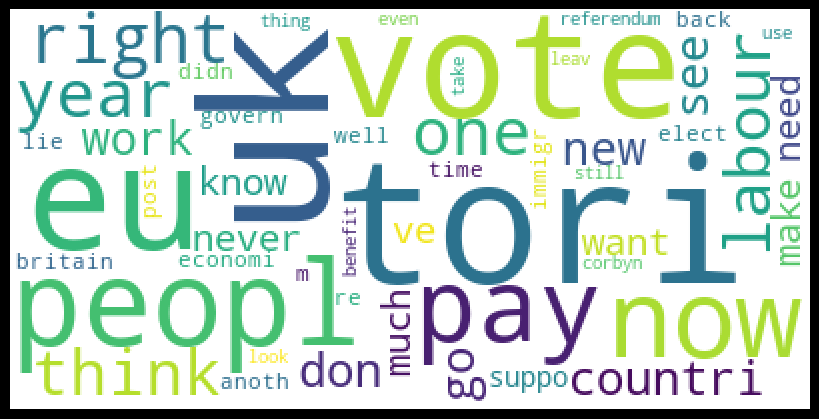

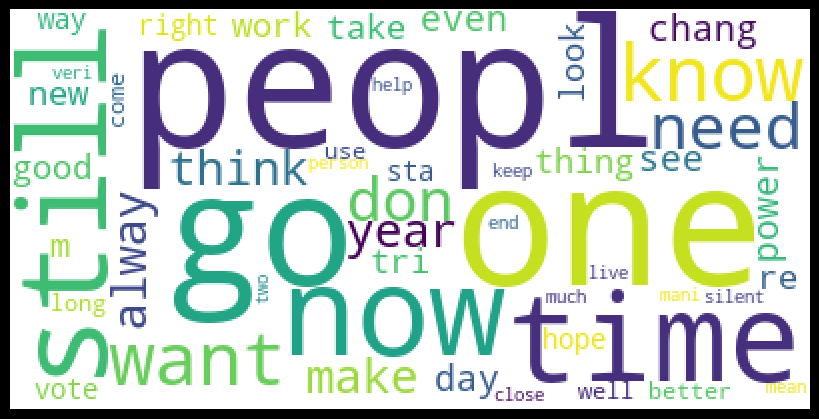

In [29]:
# stworzenie jednego tekstu na temat Brexit
brexit_text = " ".join([" ".join(tweet) for tweet in brexit_cleaned_tweets])
# stworzenie jednego tekstu na temat Remain
remain_text = " ".join([" ".join(tweet) for tweet in remain_cleaned_tweets])

# generowanie chmur słów
generate_wordcloud(brexit_text) # chmura słów dla Brexit
generate_wordcloud(remain_text) # chmura słów dla Remain

In [30]:
def count_words(text):
    word_counts = {}
    for tweet in text:
        for word in tweet:
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1
    return word_counts

        Word  Count
55         ’    240
140     vote    131
9         uk    115
0         eu    109
102     tori    107
85     peopl    100
159      pay     82
28    labour     72
35       now     70
16     right     61
1       more     60
23        up     59
49       out     59
359     year     57
267      one     56
94     think     51
77   countri     49
107       go     48
195      don     46
203      see     46
646    never     43
10      same     43
735     want     43
224     work     43
51      over     43
139     mani     41
65      know     41
191       be     40
854     need     39
165     much     37
233       ve     37
57         “     37
144     make     37
17    govern     35
84     those     35
176     well     34
79   economi     34
112     time     34
722    suppo     33
64         ”     33
341    elect     32
499     post     32
302  britain     32
190        m     31
483      lie     31
337     back     31
37    corbyn     31
438   immigr     30
48        re     30


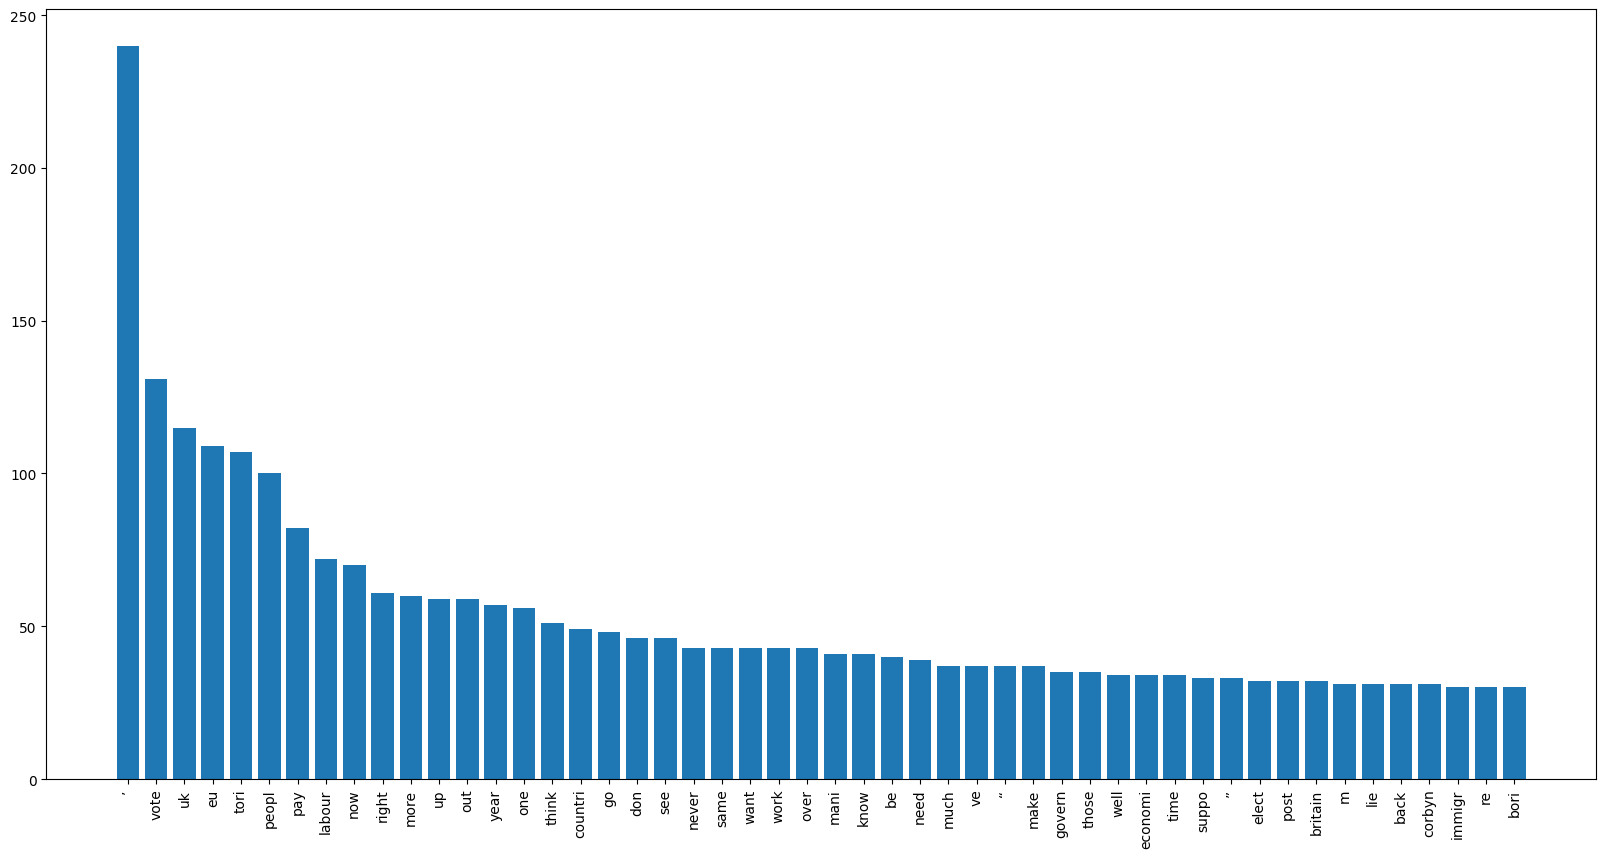

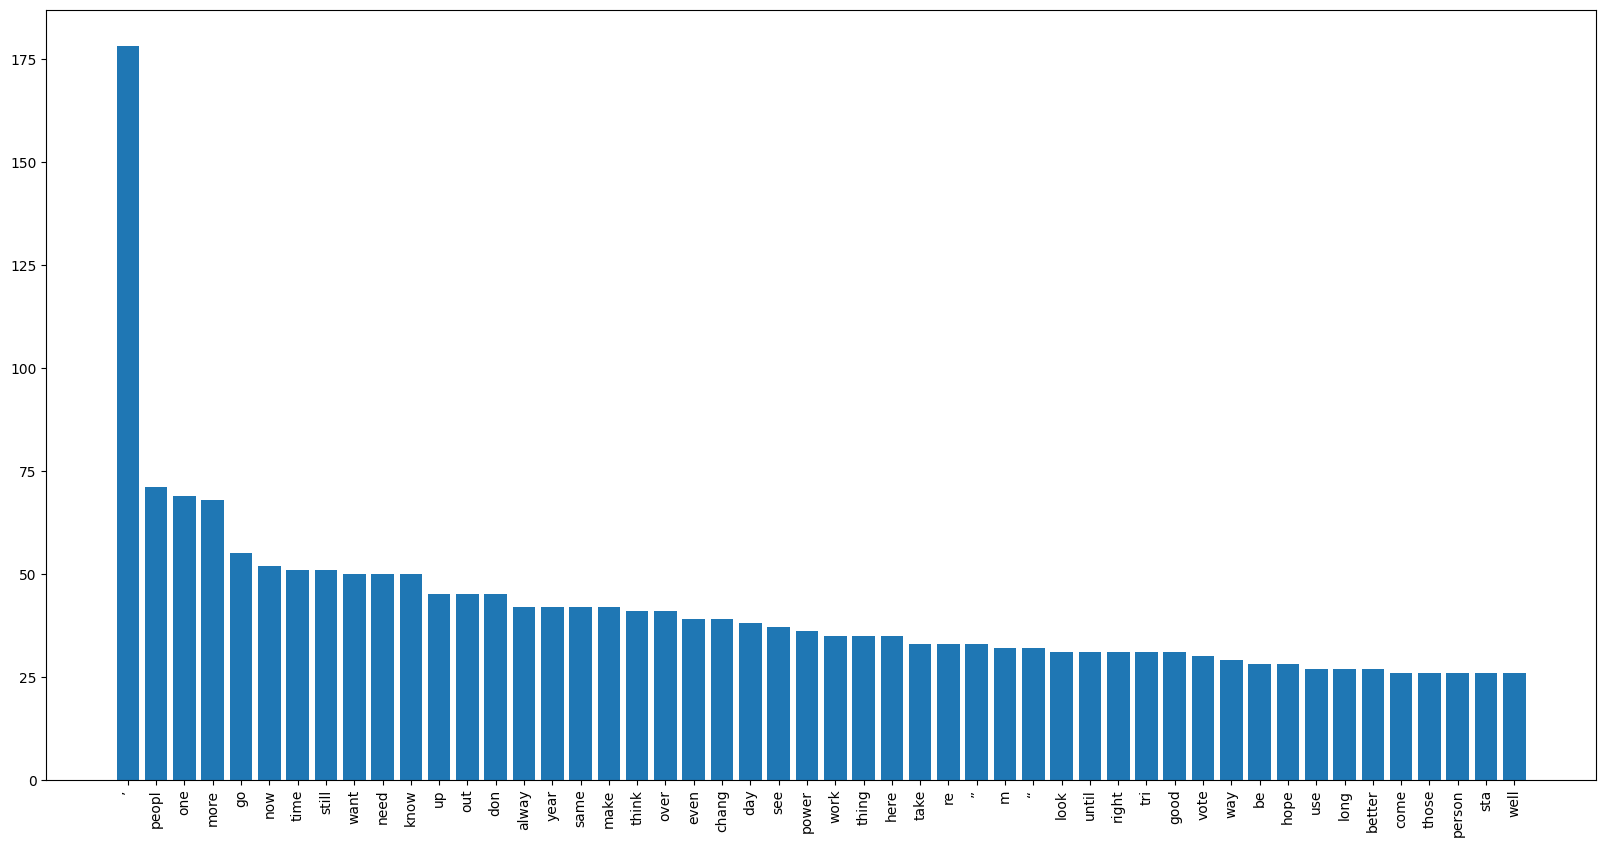

In [36]:
# policzenie słów dla Brexit
brexit_word_counts = count_words(brexit_cleaned_tweets)
# policzenie słów dla Remain
remain_word_counts = count_words(remain_cleaned_tweets)

# wyświetlenie 50 najczęściej używanych słów dla Brexit
brexit_top_50 = pd.DataFrame(list(brexit_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(brexit_top_50)

# wyświetlenie 50 najczęściej używanych słów dla Remain
remain_top_50 = pd.DataFrame(list(remain_word_counts.items()),columns = ['Word','Count']).sort_values(by=['Count'], ascending=False).head(50)
print(remain_top_50)

# wykres kolumnowy dla 50 najczęściej używanych słów dla Brexit
plt.figure(figsize=[20,10])
plt.bar(brexit_top_50["Word"], brexit_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

# wykres kolumnowy dla 50 najczęściej używanych słów dla Remain
plt.figure(figsize=[20,10])
plt.bar(remain_top_50["Word"], remain_top_50["Count"])
plt.xticks(rotation=90)
plt.show()

In [50]:
#Przygotowanie chmury słów na podstawie bag-of-words dla dwóch tekstów traktowanych jako jeden
group1_articles = get_data('brexit', 1000)
group2_articles = get_data('remain', 1000)

corpus = group1_articles + group2_articles

1640364092086013952 2023-03-27 16:44:10 +0200 <w2959994> @Saccaguru How about the effects of Brexit on the economy you reptile.
1640364091083571202 2023-03-27 16:44:10 +0200 <scottieboy32> @MrRCain2 Many hold Irish passports for no other reason than due to the scaremongering regards travel after the Brexit vote.
1640364082753617925 2023-03-27 16:44:08 +0200 <Brain1Brain> Brexit stamps out tomorrow @JANUSZCZAK @terrychristian @StrangeRichard @martinthegood @TearJulian  https://t.co/UeaBUcDgip
1640364071785570304 2023-03-27 16:44:05 +0200 <gadjobeen> @Keir_Starmer @HumzaYousaf Scottish democracy denier @Keir_Starmer and his (non UK wide) @UKLabour have been rejected in Scotland for 10+ years.  You and your Tory lite Brexit party have nothing to offer Scotland except more Westminster mediocrity   https://t.co/8iJbQ3Xbbu
1640364060733521920 2023-03-27 16:44:03 +0200 <BrianPatriots> @James49808712 I would prefer local town centres, trafalgar square has very little impact unless it gets medi

In [63]:
#Oczyszczenie tweetów z całego korpusu
corpus_cleaned = [cleaned_tweets(article) for article in corpus]

group1_words = set([word for article in corpus_cleaned[:25] for word in article])
group2_words = set([word for article in corpus_cleaned[25:] for word in article])

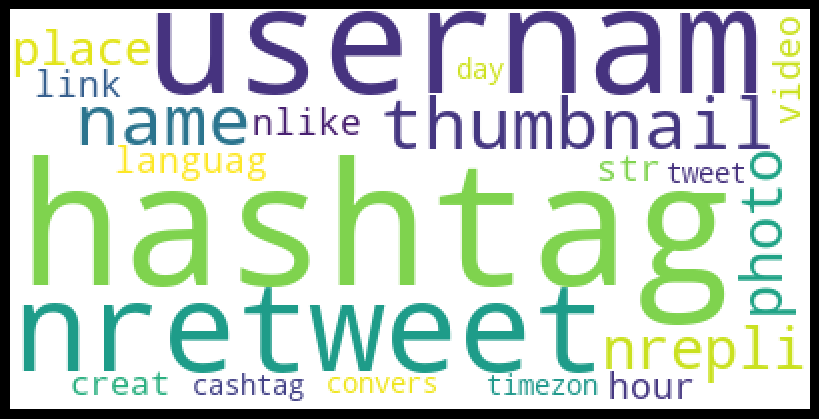

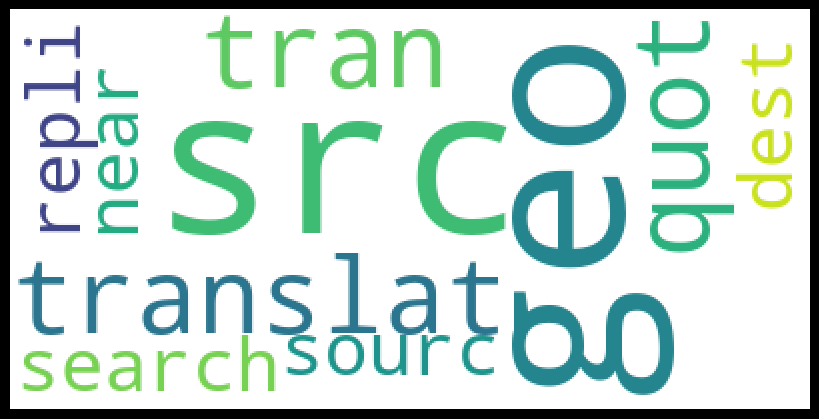

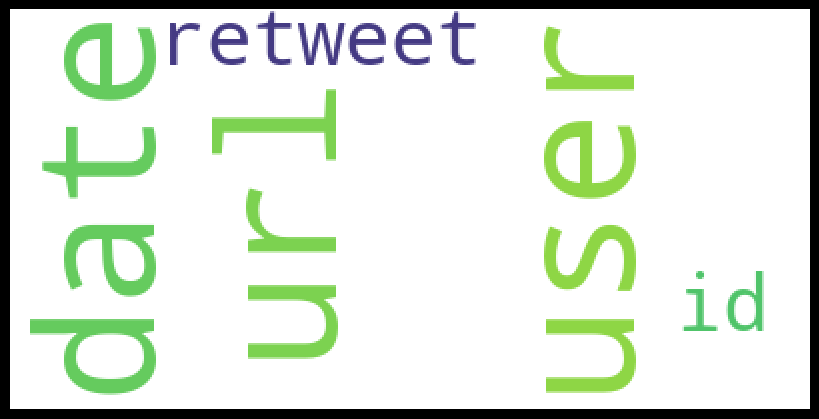

In [64]:
unique_group1_words = group1_words - group2_words
unique_group2_words = group2_words - group1_words
common_words = group1_words.intersection(group2_words)

generate_wordcloud(' '.join(unique_group1_words))
generate_wordcloud(' '.join(unique_group2_words))
generate_wordcloud(' '.join(common_words))